## HW 3 Assignment 3
Nurvirta Monarizqa (nm2773)

In [21]:
import urllib2
import pandas as pd

data = urllib2.urlopen("https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/Lab3_fb55/times.txt") 
df = pd.read_table(data, header = None, names = ['times'])

### What we know:
$T_{old} \sim N(\mu=36,\sigma=6)$

### Null Hypothesis:
$H_0$: The average of the commute time with the new bus route is THE SAME OR LONGER as it was before

$H_0 : T_{new} \geq T_{old}$

### Alternative Hypothesis:
$H_1$: The average of the commute time with the new bus route is SHORTER as it was before

$H_1: T_{new} < T_{old}$

### Confidence interval: 95%
$\alpha = 0.05$, 1 tail

### First, we calculate $z$ where $p = 0.05$

In [102]:
import scipy.stats as st
z_critical = st.norm.ppf(.95)
print ("Z value when p equals 0.05: " + str(z_critical))

Z value when p equals 0.05: 1.64485362695


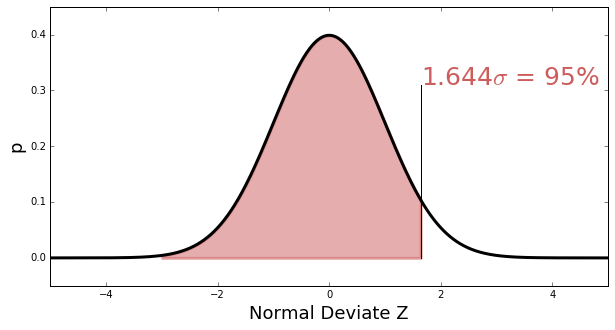

In [107]:
x = np.arange(-5,5,0.01)

gs = lambda x: np.exp((-(x)**2)/2)*1.0/np.sqrt(2*np.pi)

fig = pl.figure(4,figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(x,gs(x),color='black',lw=3)

fill_area = np.arange(-3,z_critical,.01)

ax.fill_between(fill_area,np.zeros(len(fill_area)),gs(fill_area),color='IndianRed', 
                                alpha=0.5,lw=3,label=r'1$\sigma$ = 16\%')
ax.set_xlabel("Normal Deviate Z",fontsize = 18)
ax.plot([z_critical, z_critical], [0, 0.31], 'k')
                
#pl.legend()
ax.set_ylabel("p",fontsize=18)
ax.set_ylim(-0.05,0.45)
ax.set_xlim(-5,5)
pl.text(z_critical,0.31,r'1.644$\sigma$ = 95%', color='IndianRed', size=25)
pl.show()

### Then, we calculate the mean and standard deviation of $T_{new}$

In [93]:
new_mean, new_sigma = df.mean().times, df.std().times
print ("Mean of Tnew = " + str(new_mean))
print ("Standard deviation of Tnew = " +  str(new_sigma))

Mean of Tnew = 34.4661616883
Standard deviation of Tnew = 7.13728013375


### Calculate $z$ value and visualize it:

In [110]:
z = (36-34.5)/(6/np.sqrt(100))
print ("Z value = " + str(z))

Z value = 2.5


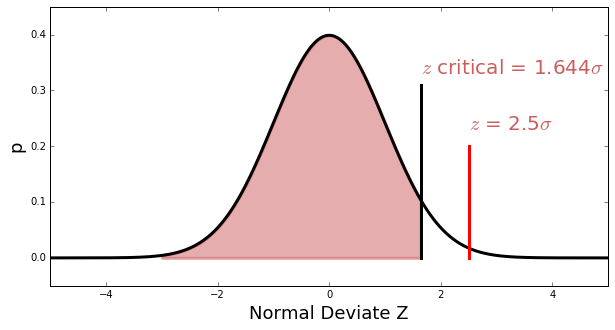

In [122]:
x = np.arange(-5,5,0.01)

gs = lambda x: np.exp((-(x)**2)/2)*1.0/np.sqrt(2*np.pi)

fig = pl.figure(4,figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(x,gs(x),color='black',lw=3)

fill_area = np.arange(-3,z_critical,.01)

ax.fill_between(fill_area,np.zeros(len(fill_area)),gs(fill_area),color='IndianRed', 
                                alpha=0.5,lw=3,label=r'1$\sigma$ = 16\%')
ax.set_xlabel("Normal Deviate Z",fontsize = 18)
ax.plot([z_critical, z_critical], [0, 0.31], 'k', lw=3)
ax.plot([z, z], [0, 0.2], 'r', lw=3)
                
#pl.legend()
ax.set_ylabel("p",fontsize=18)
ax.set_ylim(-0.05,0.45)
ax.set_xlim(-5,5)
pl.text(z_critical,0.33,r'$z$ critical = 1.644$\sigma$', color='IndianRed', size=20)
pl.text(z,0.23,r'$z$ = 2.5$\sigma$', color='IndianRed', size=20)
pl.show()

### Check whether $H_0$ is rejected

In [123]:
if z > z_critical:
    print "Null hypothesis is rejected"
else:
    print "Null hypothesis is accepted"

Null hypothesis is rejected


### Because $z = 2.5 > 1.644 = z_{critical}$, $H_0$ is rejected. 
Thus, the average of the commute time with the new bus route is SHORTER as it was before.